In [14]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
import requests
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error



In [15]:
df = pd.read_csv("Clustring 0 for time series1.csv")

In [16]:
df.head()

,Bill Doc No,30/1/2012,30/2/2012,30/3/2012,30/4/2012,30/5/2012,30/6/2012,30/7/2012,30/8/2012,30/9/2012,...,30/3/2015,30/4/2015,30/5/2015,30/6/2015,30/7/2015,30/8/2015,30/9/2015,30/10/2015,30/11/2015,30/12/2015
0,41600280341,373,2260,804,1730,960,1626,861,419,1296,...,1557,2376,745,1312,351,1475,1000,2107,1324,1050
1,42601642814,361,1286,1429,236,1372,1698,642,254,993,...,2379,581,1306,1526,1505,1038,614,411,681,940
2,41200212762,617,1172,1936,1136,2319,894,1972,1747,1982,...,2343,1538,920,608,246,740,2427,1317,175,2368
3,42400388164,1143,236,679,269,1943,609,1190,208,1633,...,604,901,2336,1753,1221,573,2171,1486,1032,797
4,42600376796,993,1691,1106,1447,1065,913,1681,2189,1021,...,1727,390,838,1148,1166,1053,1182,615,2275,1845


In [17]:
df.columns

Index(['Bill Doc No', '30/1/2012', '30/2/2012', '30/3/2012', '30/4/2012',
       '30/5/2012', '30/6/2012', '30/7/2012', '30/8/2012', '30/9/2012',
       '30/10/2012', '30/11/2012', '30/12/2012', '30/1/2013', '30/2/2013',
       '30/3/2013', '30/4/2013', '30/5/2013', '30/6/2013', '30/7/2013',
       '30/8/2013', '30/9/2013', '30/10/2013', '30/11/2013', '30/12/2013',
       '30/1/2014', '30/2/2014', '30/3/2014', '30/4/2014', '30/5/2014',
       '30/6/2014', '30/7/2014', '30/8/2014', '30/9/2014', '30/10/2014',
       '30/11/2014', '30/12/2014', '30/1/2015', '30/2/2015', '30/3/2015',
       '30/4/2015', '30/5/2015', '30/6/2015', '30/7/2015', '30/8/2015',
       '30/9/2015', '30/10/2015', '30/11/2015', '30/12/2015'],
      dtype='object')

In [18]:
columns

['Bill Doc No',
 '30/1/2012',
 '30/2/2012',
 '30/3/2012',
 '30/4/2012',
 '30/5/2012',
 '30/6/2012',
 '30/7/2012',
 '30/8/2012',
 '30/9/2012',
 '30/10/2012',
 '30/11/2012',
 '30/12/2012',
 '30/1/2013',
 '30/2/2013',
 '30/3/2013',
 '30/4/2013',
 '30/5/2013',
 '30/6/2013',
 '30/7/2013',
 '30/8/2013',
 '30/9/2013',
 '30/10/2013',
 '30/11/2013',
 '30/12/2013',
 '30/1/2014',
 '30/2/2014',
 '30/3/2014',
 '30/4/2014',
 '30/5/2014',
 '30/6/2014',
 '30/7/2014',
 '30/8/2014',
 '30/9/2014',
 '30/10/2014',
 '30/11/2014',
 '30/12/2014',
 '30/1/2015',
 '30/2/2015',
 '30/3/2015',
 '30/4/2015',
 '30/5/2015',
 '30/6/2015',
 '30/7/2015',
 '30/8/2015',
 '30/9/2015',
 '30/10/2015',
 '30/11/2015',
 '30/12/2015']

In [19]:
df = df.melt(id_vars='Bill Doc No', var_name='Date', value_name='Money')

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')


# Convert the Money column to numeric
df['Money'] = pd.to_numeric(df['Money'])

# Set the Date column as the index
# df.set_index('Date', inplace=True)

In [20]:
df.head()

,Bill Doc No,Date,Money
0,41600280341,2012-01-30,373
1,42601642814,2012-01-30,361
2,41200212762,2012-01-30,617
3,42400388164,2012-01-30,1143
4,42600376796,2012-01-30,993


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988224 entries, 0 to 988223
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Bill Doc No  988224 non-null  int64         
 1   Date         905872 non-null  datetime64[ns]
 2   Money        988224 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 22.6 MB


In [22]:
df["Bill Doc No"].nunique()

20528

In [23]:
df.tail(1)

,Bill Doc No,Date,Money
988223,10087585927,2015-12-30,1596


In [24]:
df["Money"].sum()

1356440971

In [25]:
df["Bill Doc No"].value_counts()

64735954804    96
66510763647    96
45724730493    96
19636233094    96
15102637772    96
               ..
43157925799    48
21618672436    48
71148573044    48
62960135951    48
10087585927    48
Name: Bill Doc No, Length: 20528, dtype: int64

In [26]:
df_most = df[df["Bill Doc No"] == 43157925799]

In [27]:
df_most['Date'] = df_most['Date'].fillna(df_most['Date'].shift(1) + pd.DateOffset(months=1))


/home/sam/Documents/projects/practice/fastapi/fastapi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_most.head(20)

,Bill Doc No,Date,Money
6841,43157925799,2012-01-30,1550
27429,43157925799,2012-02-29,1767
48017,43157925799,2012-03-30,1617
68605,43157925799,2012-04-30,1197
89193,43157925799,2012-05-30,1530
109781,43157925799,2012-06-30,1240
130369,43157925799,2012-07-30,1974
150957,43157925799,2012-08-30,852
171545,43157925799,2012-09-30,1972
192133,43157925799,2012-10-30,1238


In [29]:
df_most['Date'] = df_most['Date'].dt.to_period('M')

/home/sam/Documents/projects/practice/fastapi/fastapi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df_most.head()

,Bill Doc No,Date,Money
6841,43157925799,2012-01,1550
27429,43157925799,2012-02,1767
48017,43157925799,2012-03,1617
68605,43157925799,2012-04,1197
89193,43157925799,2012-05,1530


In [31]:
df_most.drop(columns="Bill Doc No", inplace=True)

/home/sam/Documents/projects/practice/fastapi/fastapi/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


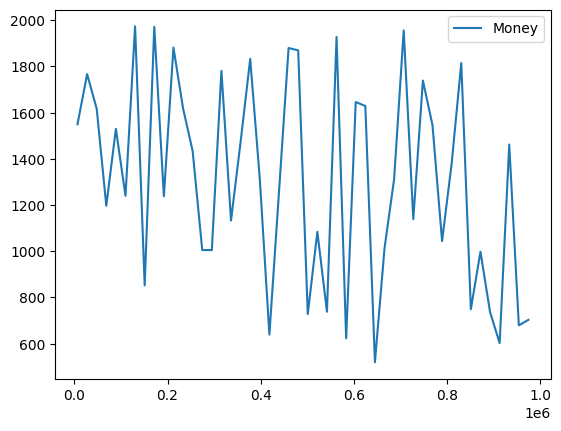

In [32]:
df_most.plot()
plt.show()

In [33]:
# load data

df_most.columns = ['ds', 'y']
df_most['ds'] = df_most['ds'].dt.to_timestamp()
# define the model
model = Prophet()
# fit the model
model.fit(df_most)

/home/sam/Documents/projects/practice/fastapi/fastapi/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
17:14:27 - cmdstanpy - INFO - Chain [1] start processing
17:14:27 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
future = list()
for i in range(1, 13):
 date = '2016-%02d' % i
 future.append([date])

print(future)

future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

[['2016-01'], ['2016-02'], ['2016-03'], ['2016-04'], ['2016-05'], ['2016-06'], ['2016-07'], ['2016-08'], ['2016-09'], ['2016-10'], ['2016-11'], ['2016-12']]


In [38]:
future.head()

,ds
0,2016-01-01
1,2016-02-01
2,2016-03-01
3,2016-04-01
4,2016-05-01


          ds         yhat  yhat_lower   yhat_upper
0 2016-01-01  1200.034033  818.410729  1550.011557
1 2016-02-01  1290.740244  917.094099  1670.776667
2 2016-03-01  1102.618564  716.511424  1502.649459
3 2016-04-01  1154.604560  749.260643  1515.775390
4 2016-05-01   849.612011  459.369210  1213.510896


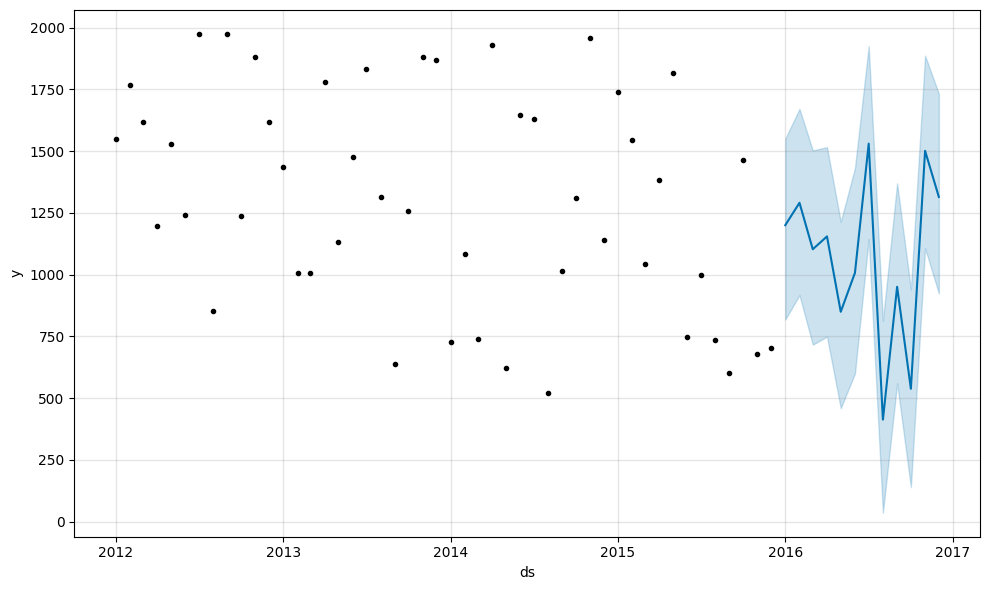

In [37]:
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.show()

### holding test set

In [30]:
train = df_most.drop(df_most.index[-12:])
print(train.tail())

               ds     y
645069 2014-08-01   519
665657 2014-09-01  1013
686245 2014-10-01  1312
706833 2014-11-01  1956
727421 2014-12-01  1139


In [33]:
# calculate MAE between expected and predicted values for december
y_true = df_most['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 292.387


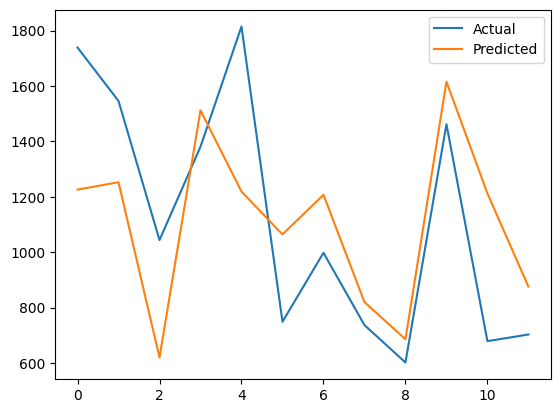

In [35]:
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [15]:
df.head()

,Bill Doc No,Date,Money
0,41600280341,2012-01-30,373
1,42601642814,2012-01-30,361
2,41200212762,2012-01-30,617
3,42400388164,2012-01-30,1143
4,42600376796,2012-01-30,993


In [11]:
import pandas as pd

# Example DataFrame
data = {
    'Bill Doc No': [41600280341, 42601642814, 41200212762, 42400388164, 42600376796],
    '30/1/2012': ['373', '361', '617', '1143', '993'],
    '30/2/2012': ['2260', '1286', '1172', '236', '1691'],
    '30/3/2012': ['804', '1429', '1936', '679', '1106'],
    '30/4/2012': ['1730', '236', '1136', '269', '1447']
}

df = pd.DataFrame(data)

# Reshape the DataFrame using melt
df = df.melt(id_vars='Bill Doc No', var_name='Date', value_name='Money')

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, format='%d/%m/%Y')


# Convert the Money column to numeric
df['Money'] = pd.to_numeric(df['Money'])

# Set the Date column as the index
df.set_index('Date', inplace=True)

print(df)



ValueError: day is out of range for month